# Introduction
This project is to showcase me using the CRISP-DM(Cross-Industry Process for Data Mining)), which is a methodolgy that provides structure when planning for a data mining project, standard on the 2018 Stack Overflow Developers Survey 

CRISP-DM consists of 6 steps.

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment


# Business understanding

For my analysis, I would like to take a further dive into the Stack Overflow Developers Survey dataset and understand the answers that my fellow Latinx/Black community gave in the survey

Questions that I would like to answer:

~~How many U.S. Latinx/Black participated in the Survey~~ ?

~~Which country had the highest of Latinx/Black participating in the Survey~~ ? 

Which type of education is prominent in the Latinx/Black community according to the survey ?

Which programming language is being used the most in the Latinx/Black community according to the survey ?

How many years did it take to learn how to code ? 


Columns that I will be analyzing in the dataset: 

- Country
- Race
- FormalEducation
- YearsProgram
- Salary
- Professional
- University
- EmploymentStatus
- EducationTypes
- DifficultCommunication


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [3]:
survey_data = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [45]:
def clean_multi_answers(df, index_name, column_name):
    '''
    INPUT 
        df - a dataframe holding the Race column
    OUTPUT
        races_df - a dataframe with the count of people who reported their race
    '''
    races_df = total_count(df, index_name, column_name)
    races_df.set_index(index_name, inplace=True)
    return races_df

def total_count(df, index_name, column_name):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    OUTPUT:
    counts - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = df[column_name].value_counts().reset_index()
    new_df.rename(columns={'index': index_name, column_name: 'count'}, inplace=True)
    counts = defaultdict(int)
    for race in parse_multi_answer(df, column_name):
        for idx in range(new_df.shape[0]):
            developer_races = [race_entry.strip() for race_entry in new_df[index_name][idx].split(";")]
            if race in developer_races:
                counts[race] += int(new_df['count'][idx])
    counts = pd.DataFrame(pd.Series(counts)).reset_index()
    counts.columns = [index_name, 'count']
    counts.sort_values('count', ascending=False, inplace=True)
    return counts


def parse_multi_answer(df, column):
    races = set()
    for idx in df[df[column].notnull()].index:
        for entry in df[column].iloc[idx].split(';'):
            races.add(entry.strip())
    return races

def plot_various_race_distribution(df):
    f, ax = plt.subplots(figsize=(7,5))
    races = list(df.index)[::-1]
    counts = df['count'].values[::-1]
    ax.barh(races, counts, 0.35, color='orange')
    ax.set_title("Different Races that filled out SOD survey")   
    plt.show()
    
def plot_latinx_black_distribution(df):
    f, ax = plt.subplots(figsize=(10,3))
    values_to_show = df.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
    races = list(df[values_to_show].index)[::-1]
    counts = df[values_to_show]['count'].values[::-1]
    ax.barh(races, counts, 0.35, color='red')
    ax.set_title('Latinx/Black participants that filled SOD survey') 
    plt.show()
    

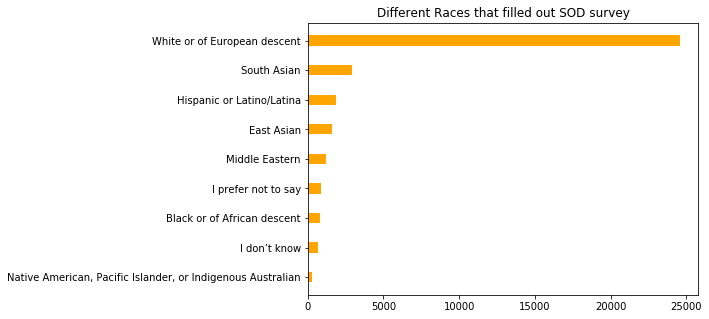

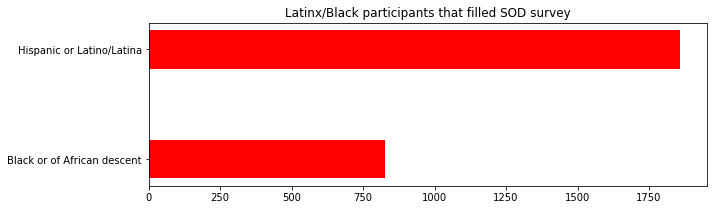

In [46]:
races_df = clean_multi_answers(survey_data, 'index_type', 'Race')
plot_various_race_distribution(races_df)
plot_latinx_black_distribution(races_df)

In [6]:
values = races_df.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
total = np.sum(races_df[values].values)

print("\n{} individuals reported as Latinx/Black participated in the Stack Overflow Developer survey".format(total))


2687 individuals reported as Latinx/Black participated in the Stack Overflow Developer survey


In [7]:
question2 = survey_data[['Country',
'Race',
'FormalEducation',
'YearsProgram',
'Professional',
'University',
'EmploymentStatus',
'EducationTypes',
'DifficultCommunication']]


In [8]:
def get_indexes_latinx_and_black(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races or 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_latinx(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_black(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

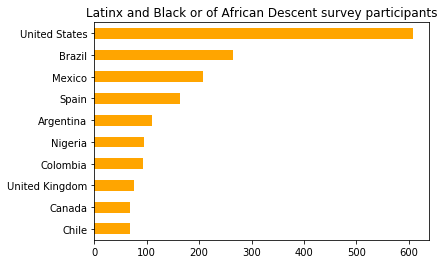

In [36]:
#Both Latinx and Black/African Descent
df = survey_data.loc[get_indexes_latinx_and_black(question2),:].reset_index()
df['Country'].value_counts()[:10]
df['Country'].value_counts()[:10][::-1].plot(kind="barh", 
                                             title="Latinx and Black or of African Descent survey participants",
                                             color="orange")

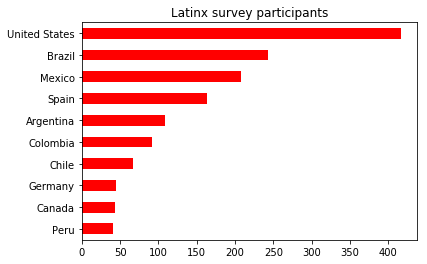

In [37]:
#Latinx
df = survey_data.loc[get_indexes_latinx(question2),:].reset_index()
df['Country'].value_counts()[:10]
df['Country'].value_counts()[:10][::-1].plot(kind="barh", 
                                             title="Latinx survey participants",
                                             color="red")

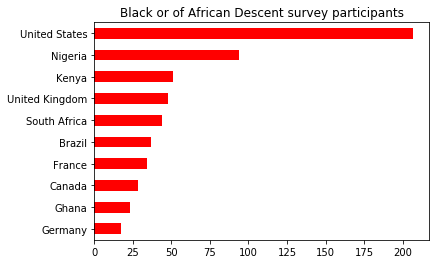

In [38]:
#Black/African Descent
df = survey_data.loc[get_indexes_black(question2),:].reset_index()
df['Country'].value_counts()[:10]
ax = df['Country'].value_counts()[:10][::-1].plot(kind="barh", 
                                                  title="Black or of African Descent survey participants",
                                                  color="red")